In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import ta
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim.lr_scheduler import ReduceLROnPlateau, StepLR
from torch.utils.data import DataLoader

In [21]:
data = yf.download(
    "SPY",
    start="1990-01-01",
    end="2021-01-01",
    auto_adjust = True,
    group_by="Ticker",
)

[*********************100%***********************]  1 of 1 completed


In [29]:
def setlabel(row):
    return 2 if row['next_diff_curr'] > 0 else 0 if row['next_diff_curr'] < 0 else 1

df = ta.utils.dropna(data)
df = ta.add_all_ta_features(df, "Open", "High", "Low", "Close", "Volume", fillna=True)

df['next_diff_curr'] = df['Close'].shift(-1) - df['Close']
df['label'] = df.apply(setlabel, axis=1)

/Users/qingweilan/.pyenv/versions/3.8.12/lib/python3.8/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/Users/qingweilan/.pyenv/versions/3.8.12/lib/python3.8/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [39]:
df['feature_sma_diff'] = df['trend_sma_fast'] - df['trend_sma_slow']
df['feature_ema_diff'] = df['trend_ema_fast'] - df['trend_ema_slow']
df['feature_diff_bbl'] = df['Close'] - df['volatility_bbl']
df['feature_diff_bbh'] = df['volatility_bbh'] - df['Close']

In [30]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'volume_adi', 'volume_obv',
       'volume_cmf', 'volume_fi', 'volume_mfi', 'volume_em', 'volume_sma_em',
       'volume_vpt', 'volume_nvi', 'volume_vwap', 'volatility_atr',
       'volatility_bbm', 'volatility_bbh', 'volatility_bbl', 'volatility_bbw',
       'volatility_bbp', 'volatility_bbhi', 'volatility_bbli',
       'volatility_kcc', 'volatility_kch', 'volatility_kcl', 'volatility_kcw',
       'volatility_kcp', 'volatility_kchi', 'volatility_kcli',
       'volatility_dcl', 'volatility_dch', 'volatility_dcm', 'volatility_dcw',
       'volatility_dcp', 'volatility_ui', 'trend_macd', 'trend_macd_signal',
       'trend_macd_diff', 'trend_sma_fast', 'trend_sma_slow', 'trend_ema_fast',
       'trend_ema_slow', 'trend_adx', 'trend_adx_pos', 'trend_adx_neg',
       'trend_vortex_ind_pos', 'trend_vortex_ind_neg', 'trend_vortex_ind_diff',
       'trend_trix', 'trend_mass_index', 'trend_cci', 'trend_dpo', 'trend_kst',
       'trend_kst_sig', '

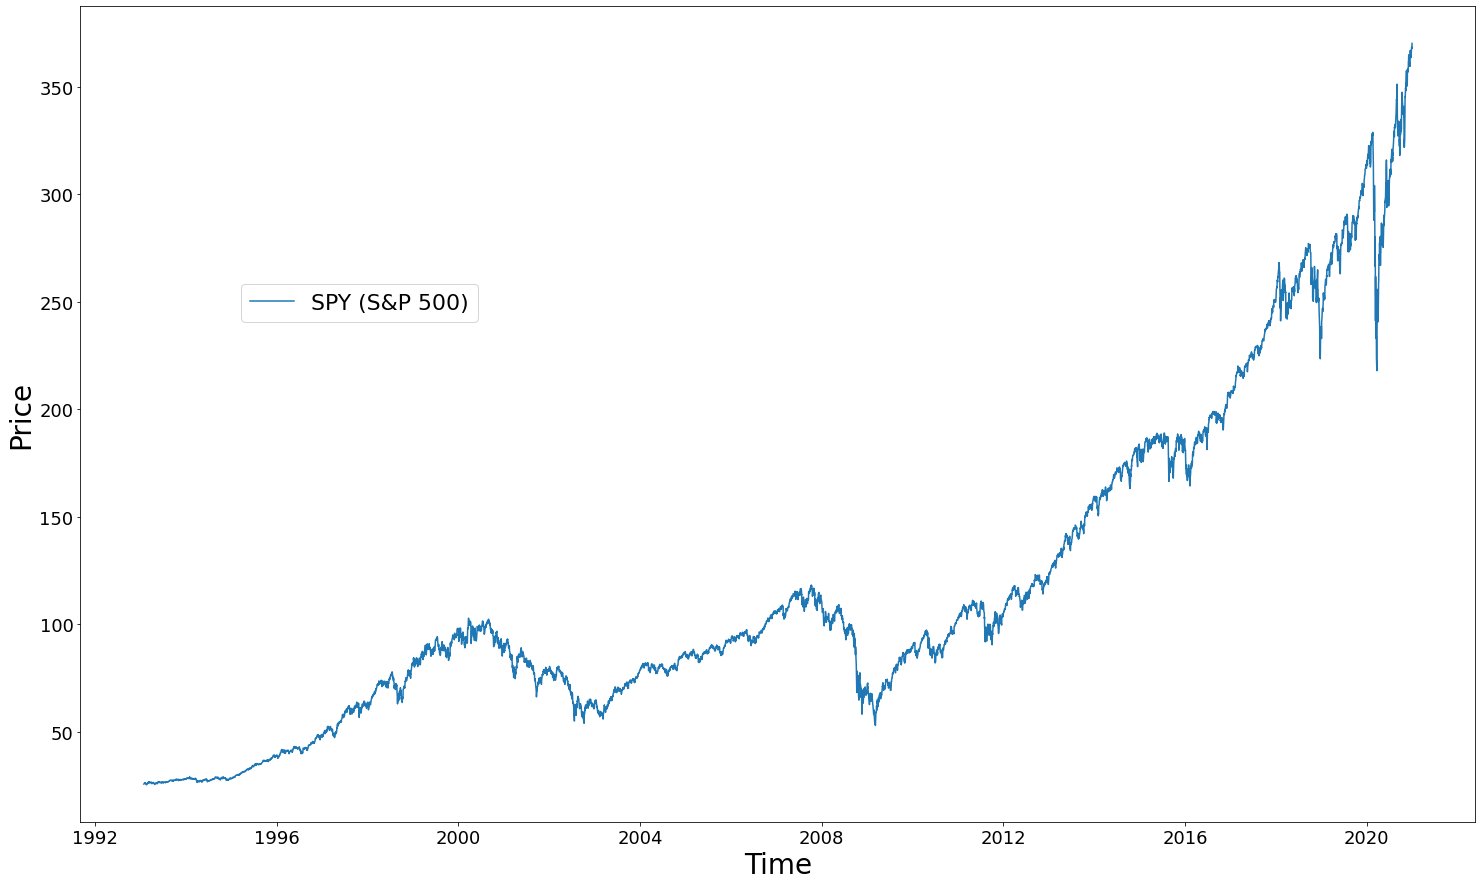

In [5]:
plt.figure(figsize=(25,15))

plt.plot(data['Close'], label='SPY (S&P 500)')

plt.legend(loc='lower center', bbox_to_anchor=(0.2, 0.6), fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time', fontsize=28)
plt.ylabel('Price', fontsize=28)

plt.show()

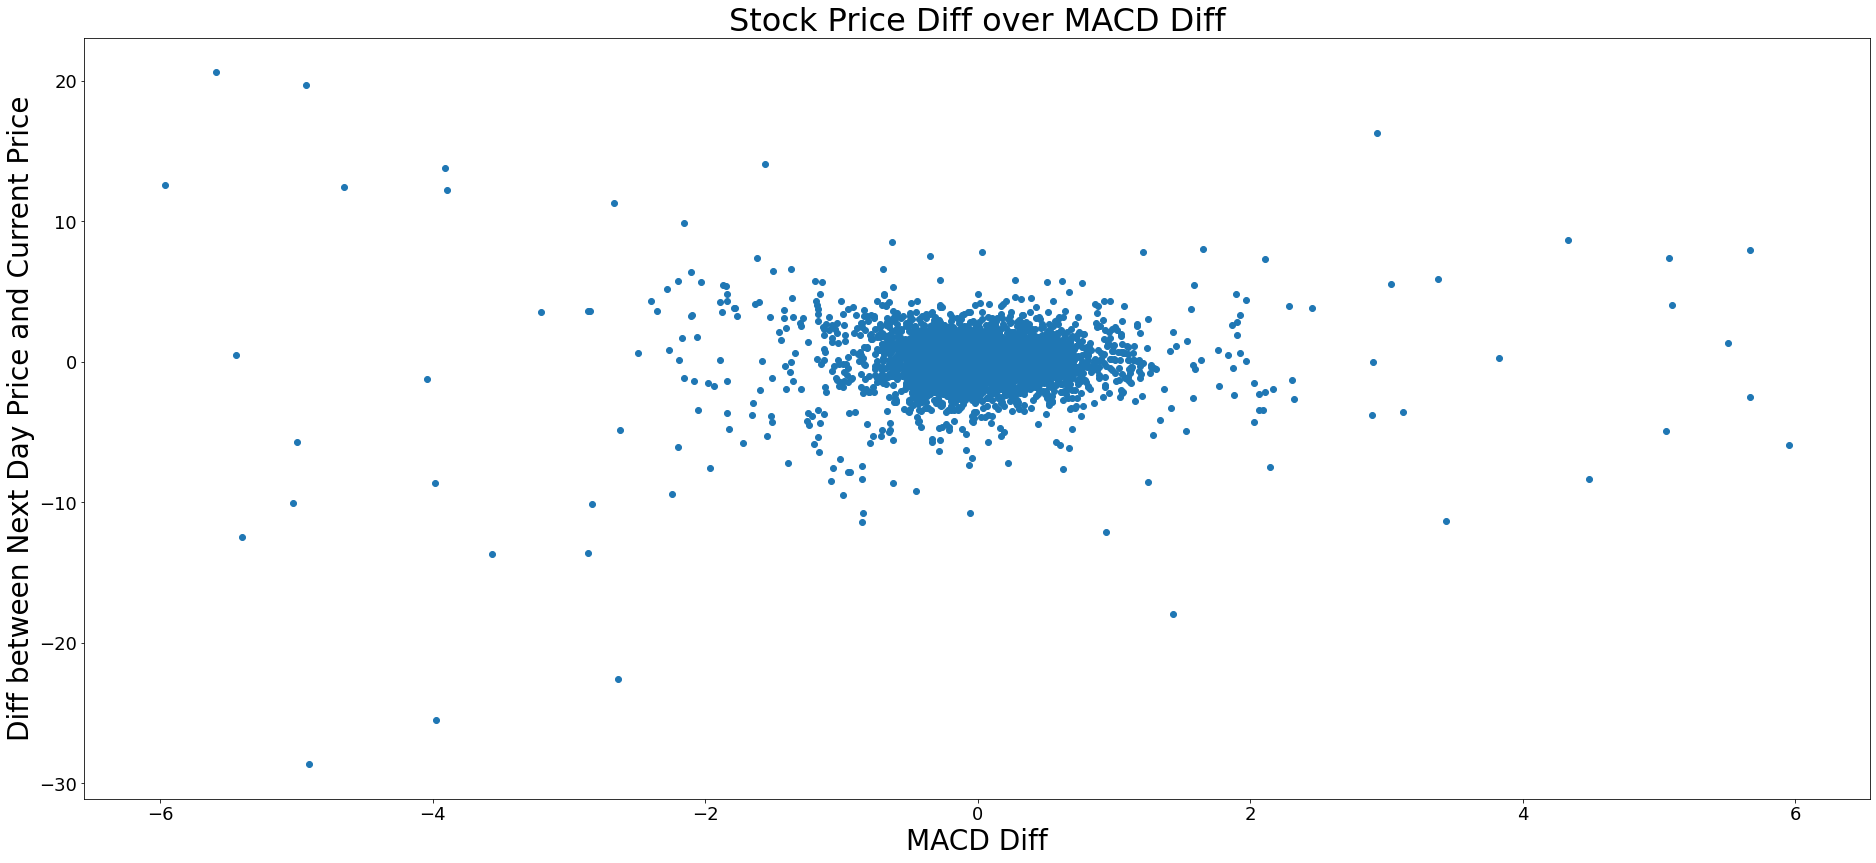

In [54]:
plt.figure(figsize=(32,14))

plt.scatter(df['trend_macd_diff'], df['next_diff_curr'])

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('MACD Diff', fontsize=28)
plt.ylabel('Diff between Next Day Price and Current Price', fontsize=28)

plt.title('Stock Price Diff over MACD Diff', fontsize=32)

plt.show()

In [32]:
ydays = 252
start = ydays * 18
end = start + ydays

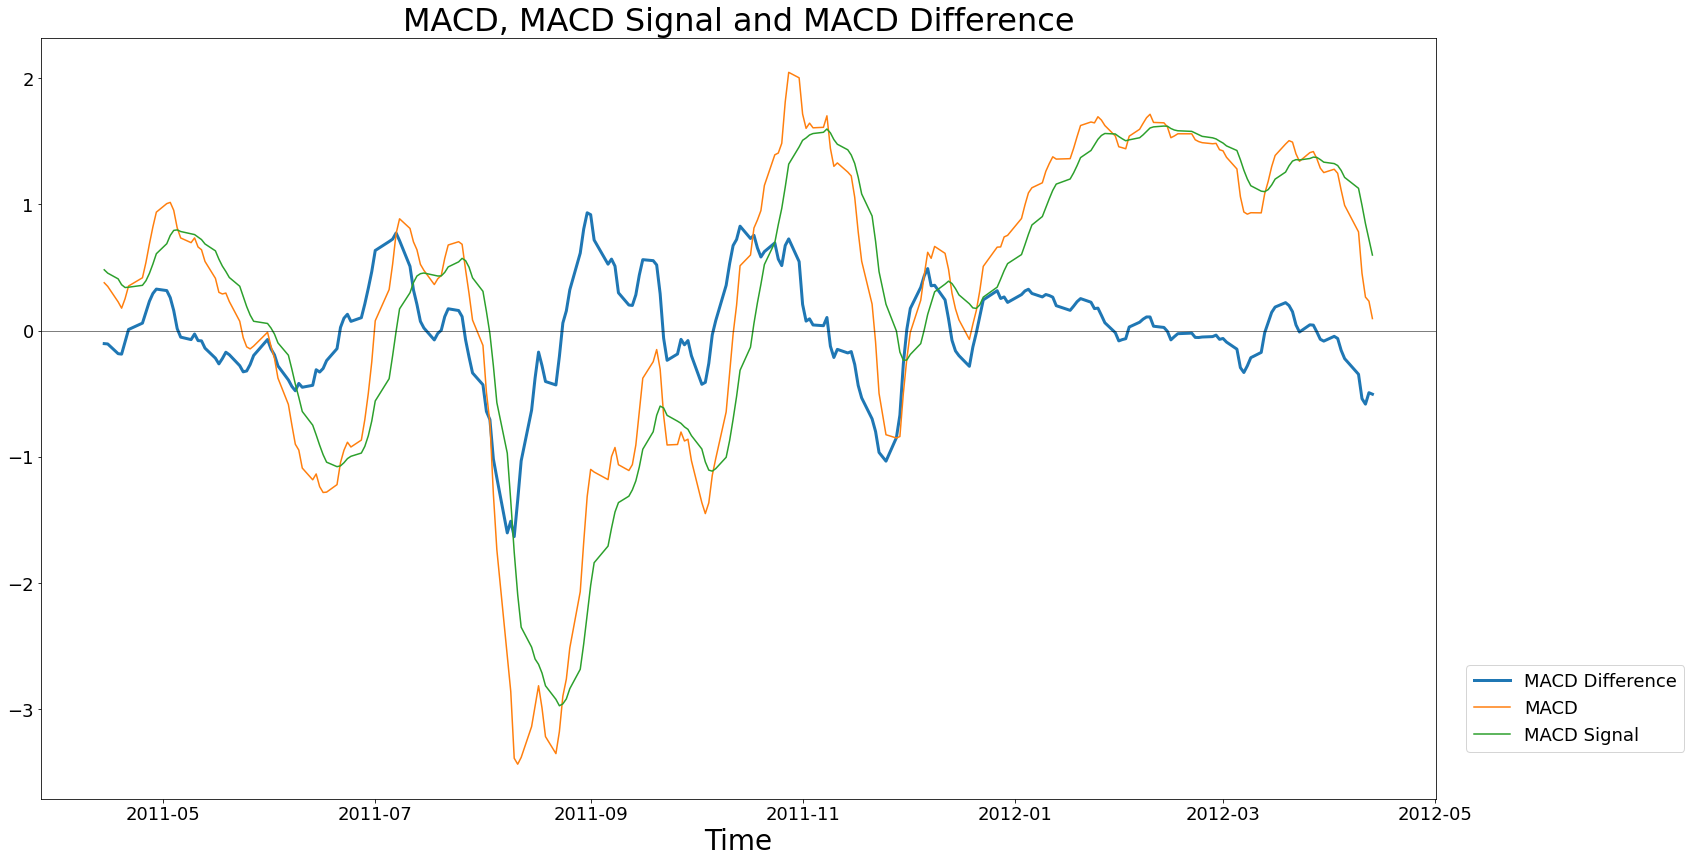

In [13]:
plt.figure(figsize=(25,14))

plt.plot(df[start:end]['trend_macd_diff'], label='MACD Difference', linewidth=3)
plt.plot(df[start:end]['trend_macd'], label='MACD')
plt.plot(df[start:end]['trend_macd_signal'], label='MACD Signal')

plt.legend(loc='lower center', bbox_to_anchor=(1.1, 0.05), fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time', fontsize=28)

plt.axhline(0, color='black', linewidth=0.5)

plt.title('MACD, MACD Signal and MACD Difference', fontsize=32)

plt.show()

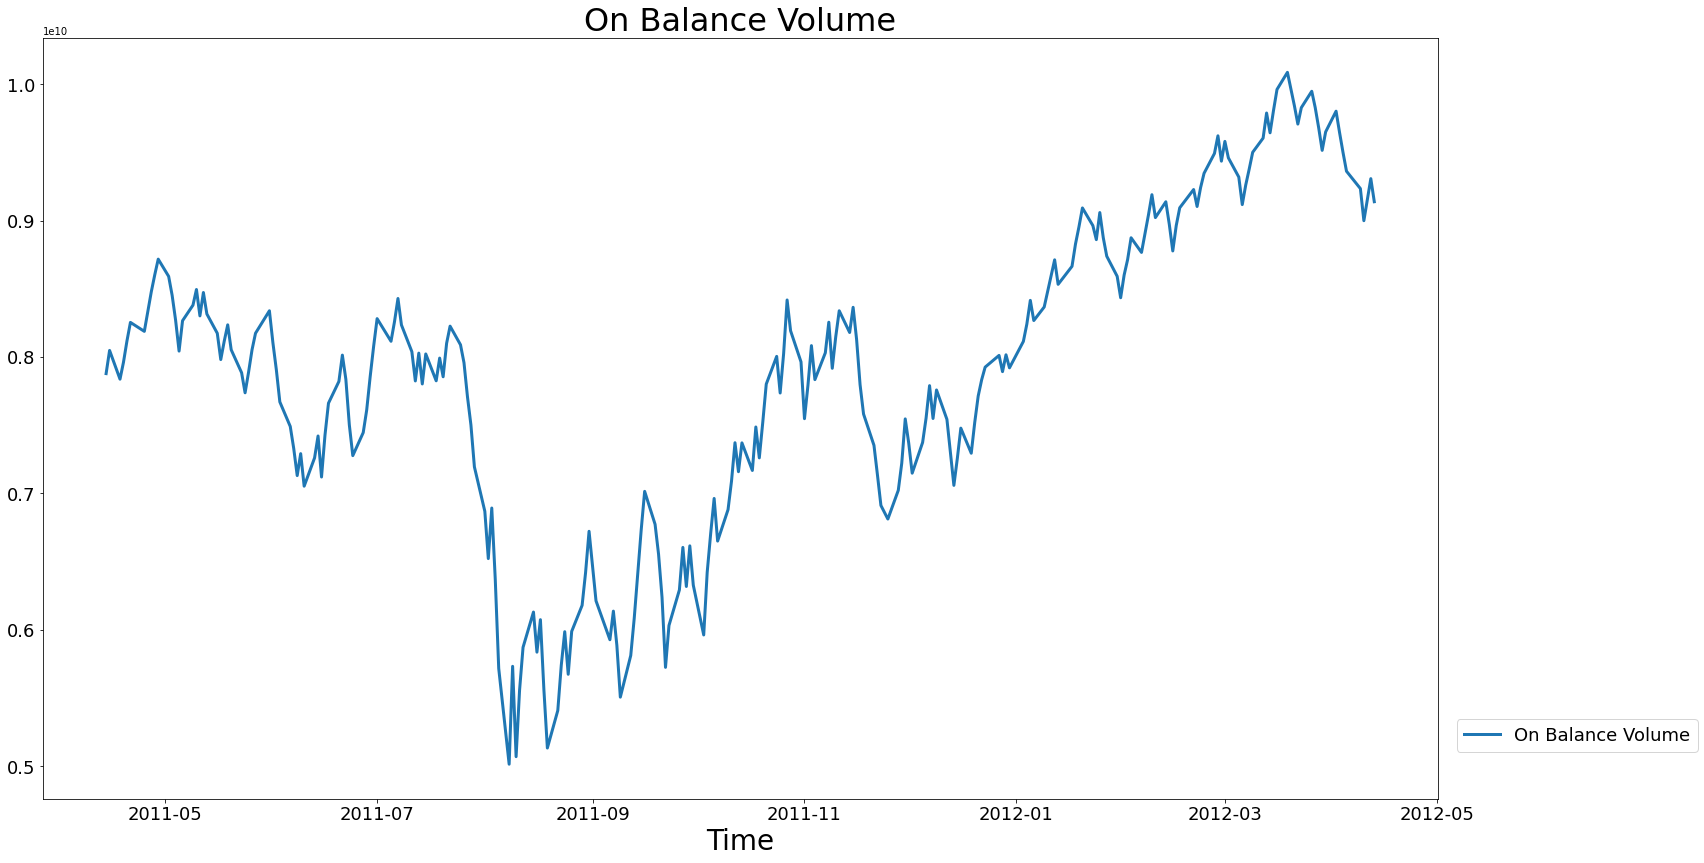

In [14]:
plt.figure(figsize=(25,14))

plt.plot(df[start:end]['volume_obv'], label='On Balance Volume', linewidth=3)

plt.legend(loc='lower center', bbox_to_anchor=(1.1, 0.05), fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time', fontsize=28)

plt.title('On Balance Volume', fontsize=32)

plt.show()

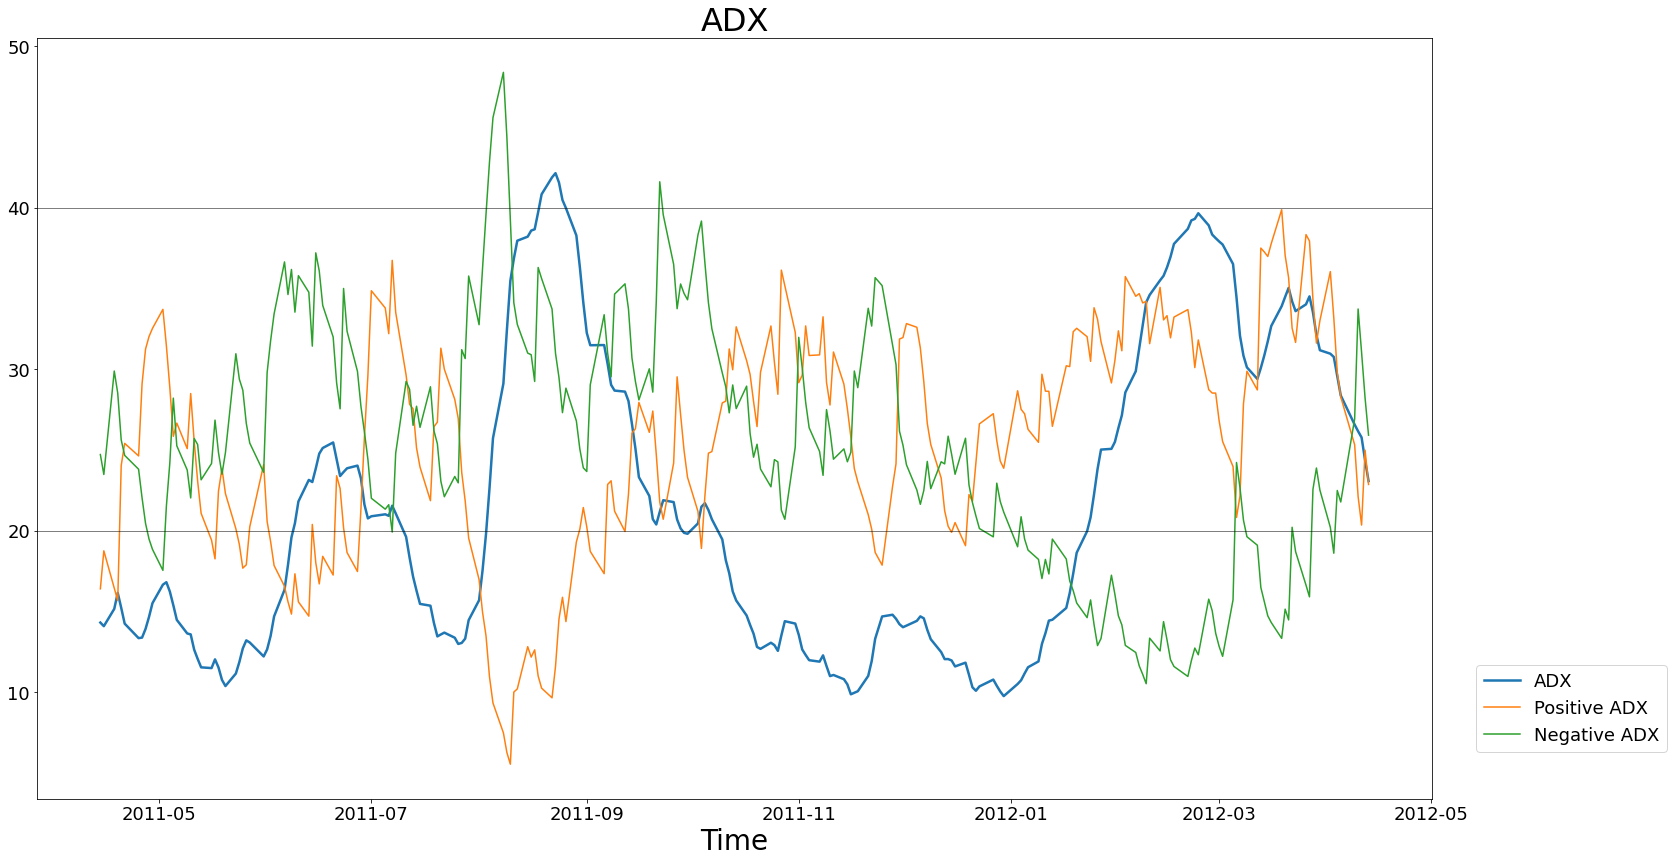

In [15]:
plt.figure(figsize=(25,14))

plt.plot(df[start:end]['trend_adx'], label='ADX', linewidth=2.5)
plt.plot(df[start:end]['trend_adx_pos'], label='Positive ADX')
plt.plot(df[start:end]['trend_adx_neg'], label='Negative ADX')

plt.legend(loc='lower center', bbox_to_anchor=(1.1, 0.05), fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time', fontsize=28)

plt.axhline(40, color='black', linewidth=0.5)
plt.axhline(20, color='black', linewidth=0.5)

plt.title('ADX', fontsize=32)

plt.show()

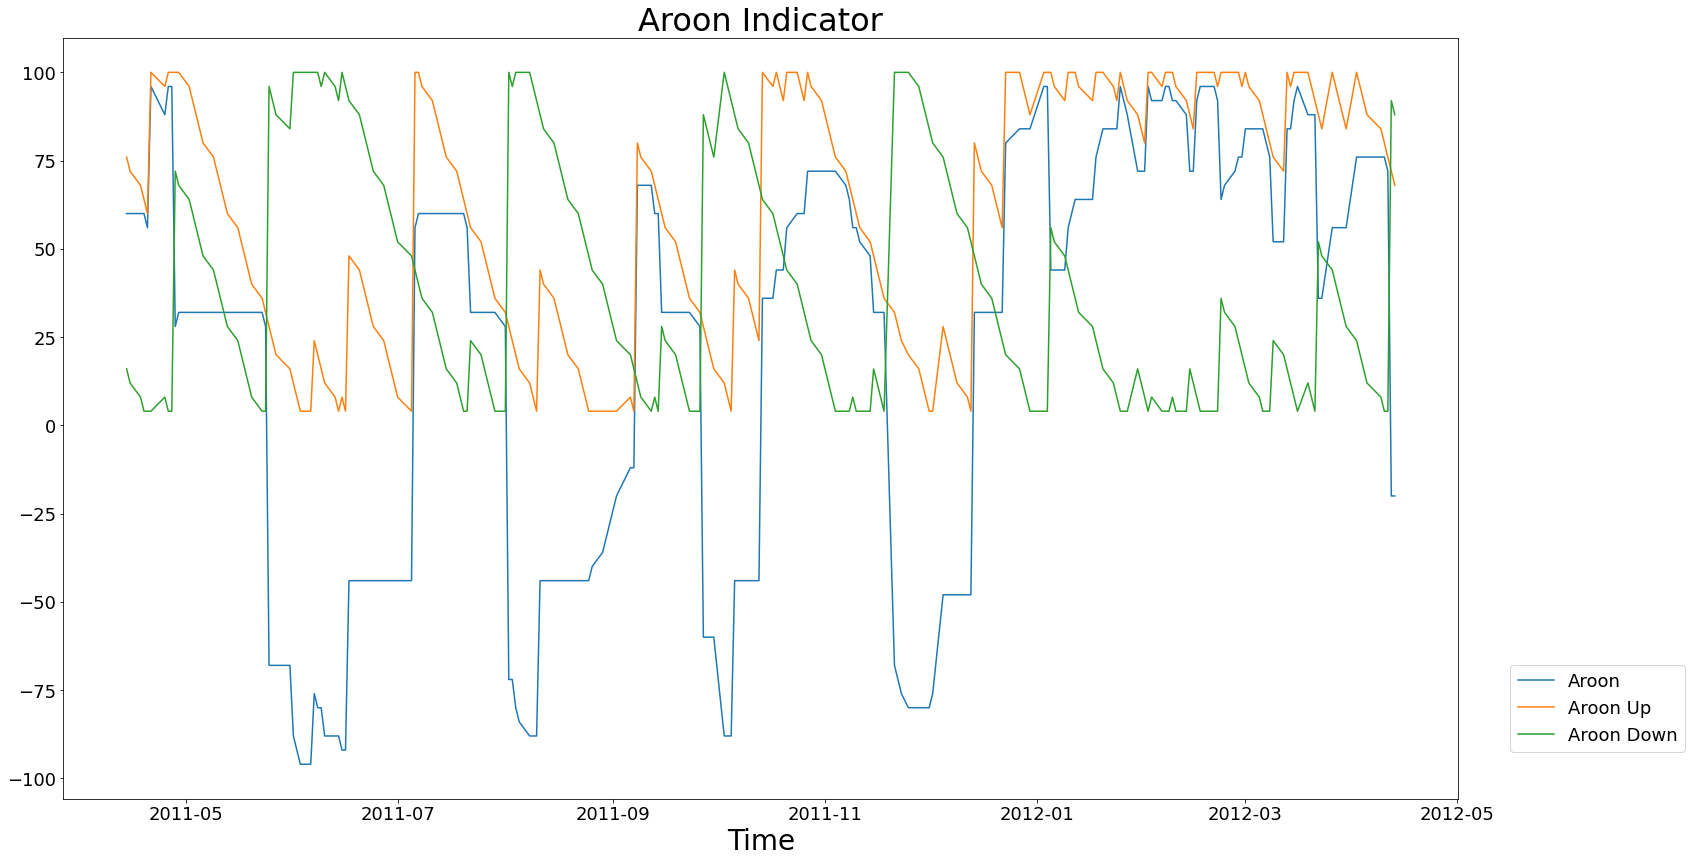

In [16]:
plt.figure(figsize=(25,14))

plt.plot(df[start:end]['trend_aroon_ind'], label='Aroon')
plt.plot(df[start:end]['trend_aroon_up'], label='Aroon Up')
plt.plot(df[start:end]['trend_aroon_down'], label='Aroon Down')

plt.legend(loc='lower center', bbox_to_anchor=(1.1, 0.05), fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time', fontsize=28)

plt.title('Aroon Indicator', fontsize=32)

plt.show()

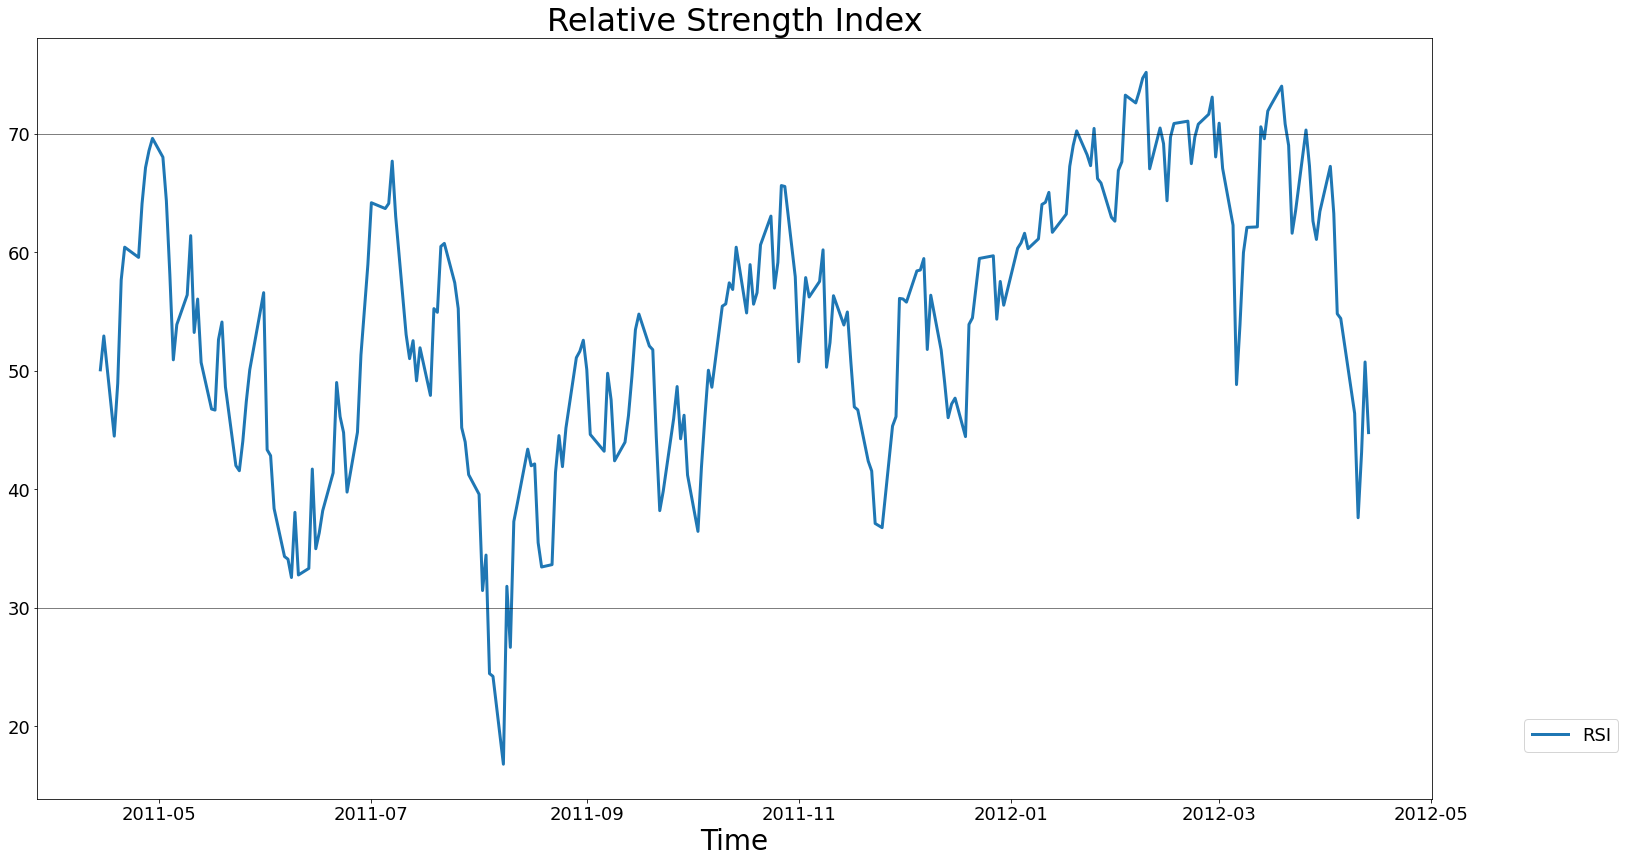

In [17]:
plt.figure(figsize=(25,14))

plt.plot(df[start:end]['momentum_rsi'], label='RSI', linewidth=3)

plt.legend(loc='lower center', bbox_to_anchor=(1.1, 0.05), fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time', fontsize=28)

plt.axhline(30, color='black', linewidth=0.5)
plt.axhline(70, color='black', linewidth=0.5)

plt.title('Relative Strength Index', fontsize=32)

plt.show()

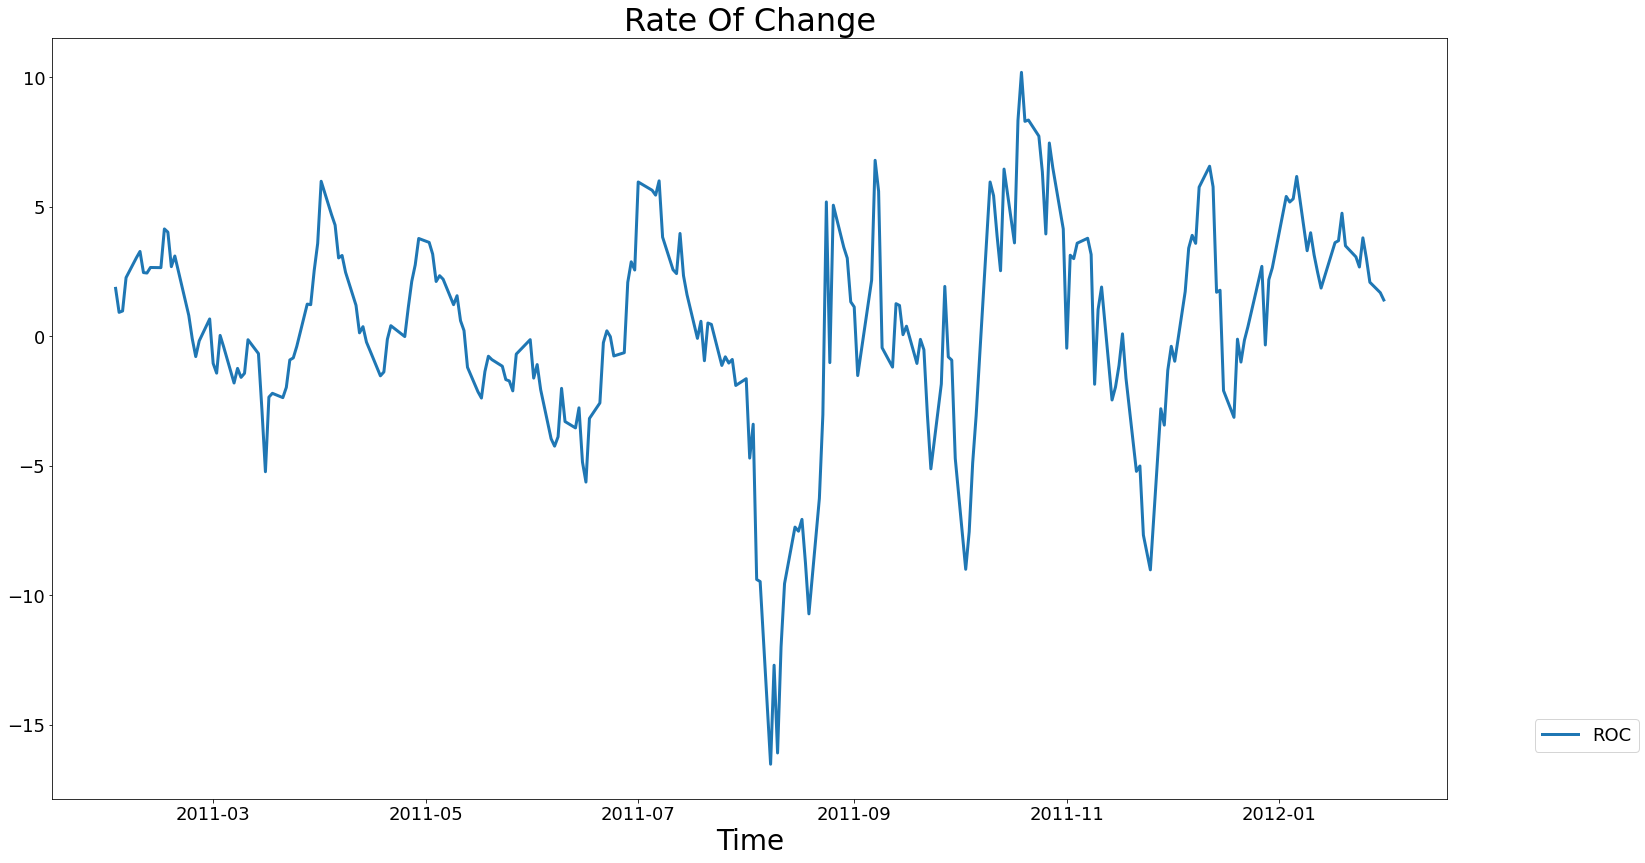

In [35]:
plt.figure(figsize=(25,14))

plt.plot(df[start:end]['momentum_roc'], label='ROC', linewidth=3)

plt.legend(loc='lower center', bbox_to_anchor=(1.1, 0.05), fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time', fontsize=28)

plt.title('Rate Of Change', fontsize=32)

plt.show()

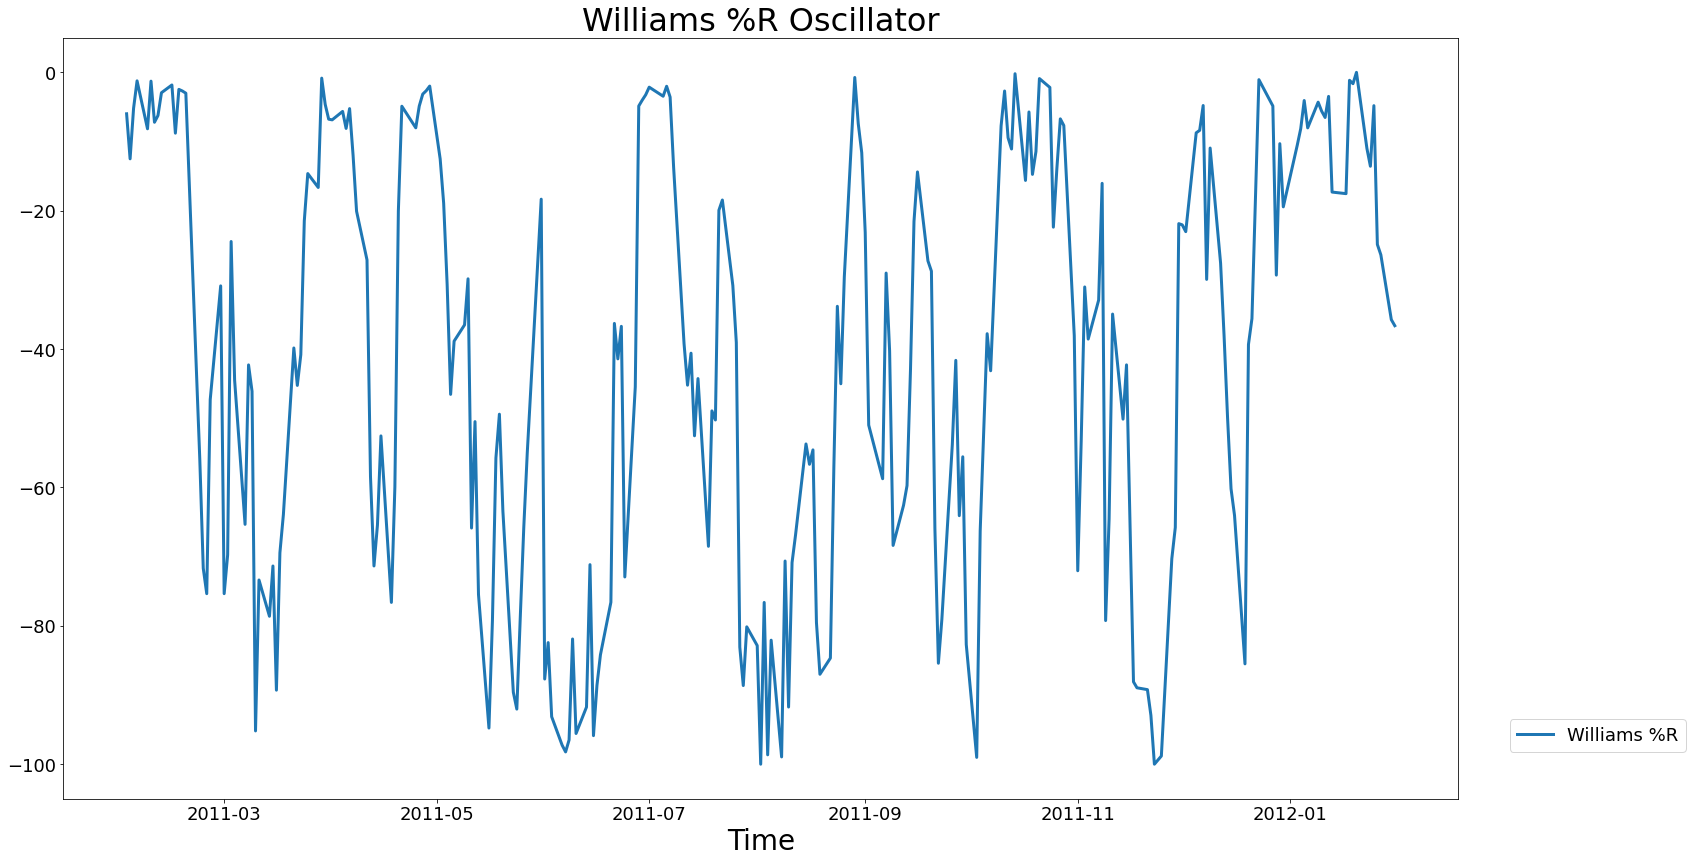

In [38]:
plt.figure(figsize=(25,14))

plt.plot(df[start:end]['momentum_wr'], label='Williams %R', linewidth=3)

plt.legend(loc='lower center', bbox_to_anchor=(1.1, 0.05), fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time', fontsize=28)

plt.title('Williams %R Oscillator', fontsize=32)

plt.show()

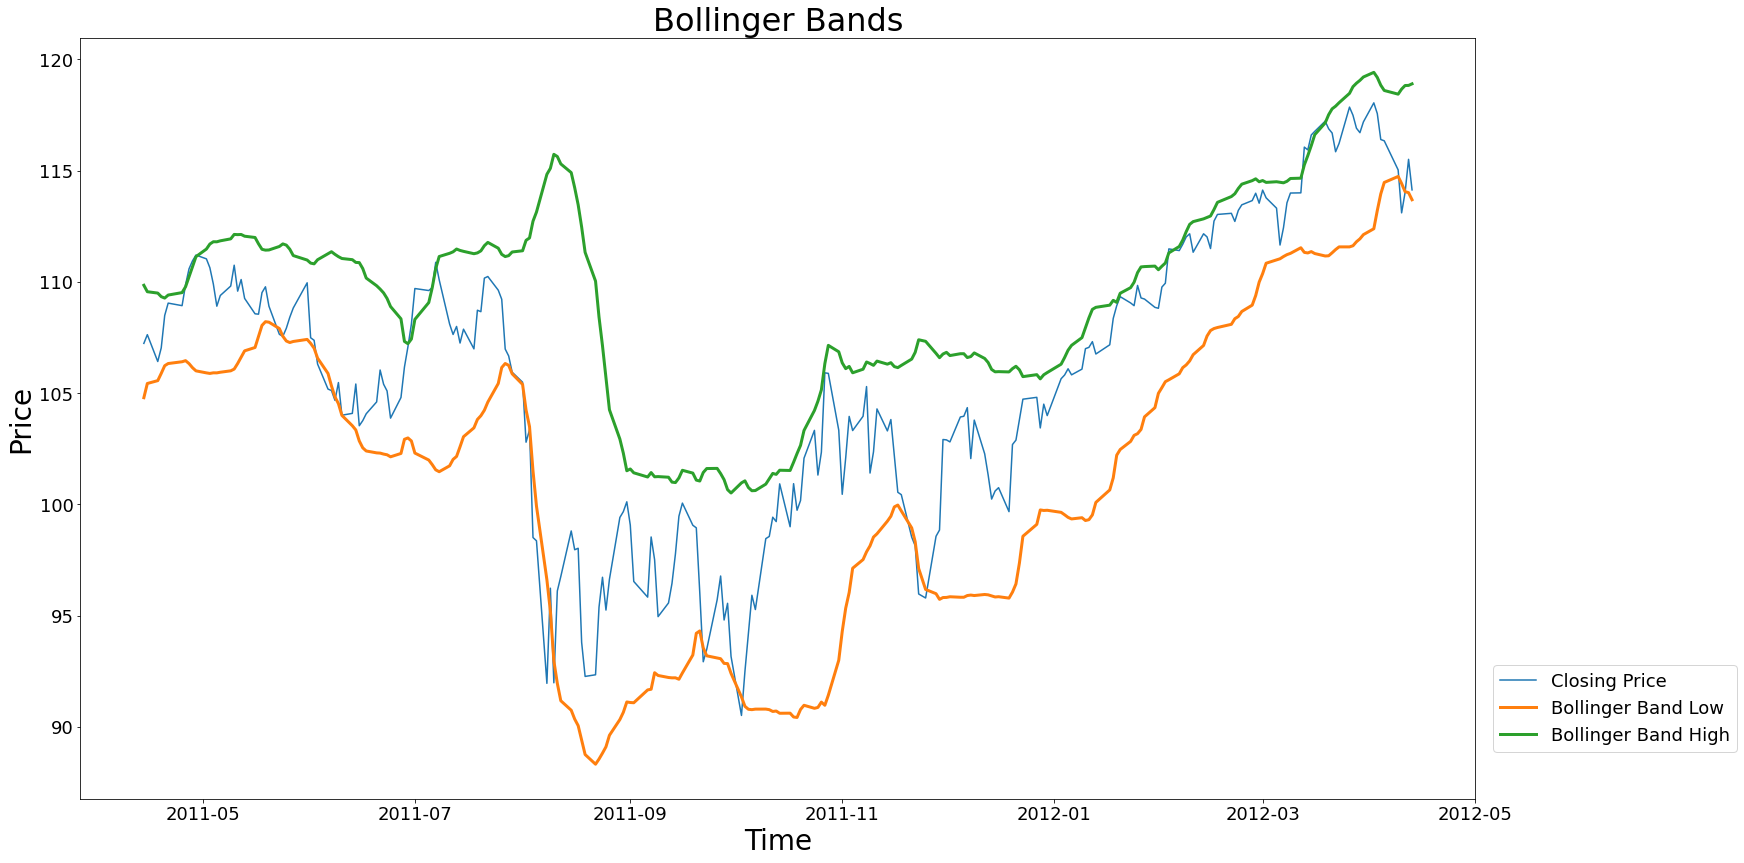

In [18]:
plt.figure(figsize=(25,14))

plt.plot(df[start:end]['Close'], label='Closing Price')
plt.plot(df[start:end]['volatility_bbl'], label='Bollinger Band Low', linewidth=3)
plt.plot(df[start:end]['volatility_bbh'], label='Bollinger Band High', linewidth=3)

plt.legend(loc='lower center', bbox_to_anchor=(1.1, 0.05), fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time', fontsize=28)
plt.ylabel('Price', fontsize=28)

plt.title('Bollinger Bands', fontsize=32)

plt.show()

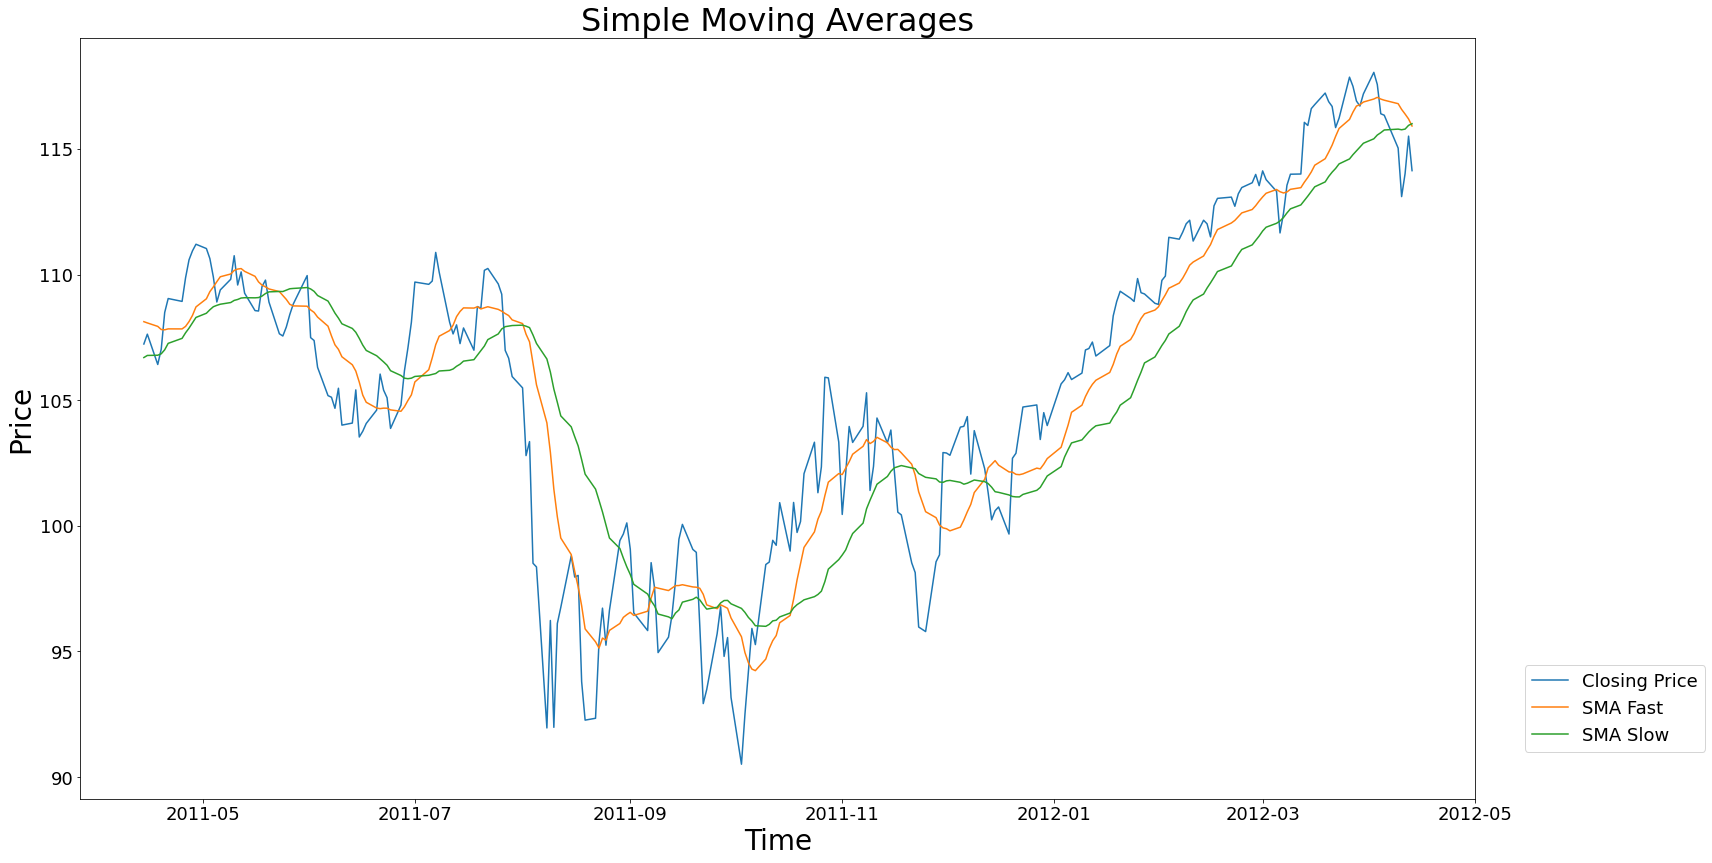

In [19]:
plt.figure(figsize=(25,14))

plt.plot(df[start:end]['Close'], label='Closing Price')
plt.plot(df[start:end]['trend_sma_fast'], label='SMA Fast')
plt.plot(df[start:end]['trend_sma_slow'], label='SMA Slow')

plt.legend(loc='lower center', bbox_to_anchor=(1.1, 0.05), fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time', fontsize=28)
plt.ylabel('Price', fontsize=28)

plt.title('Simple Moving Averages', fontsize=32)

plt.show()

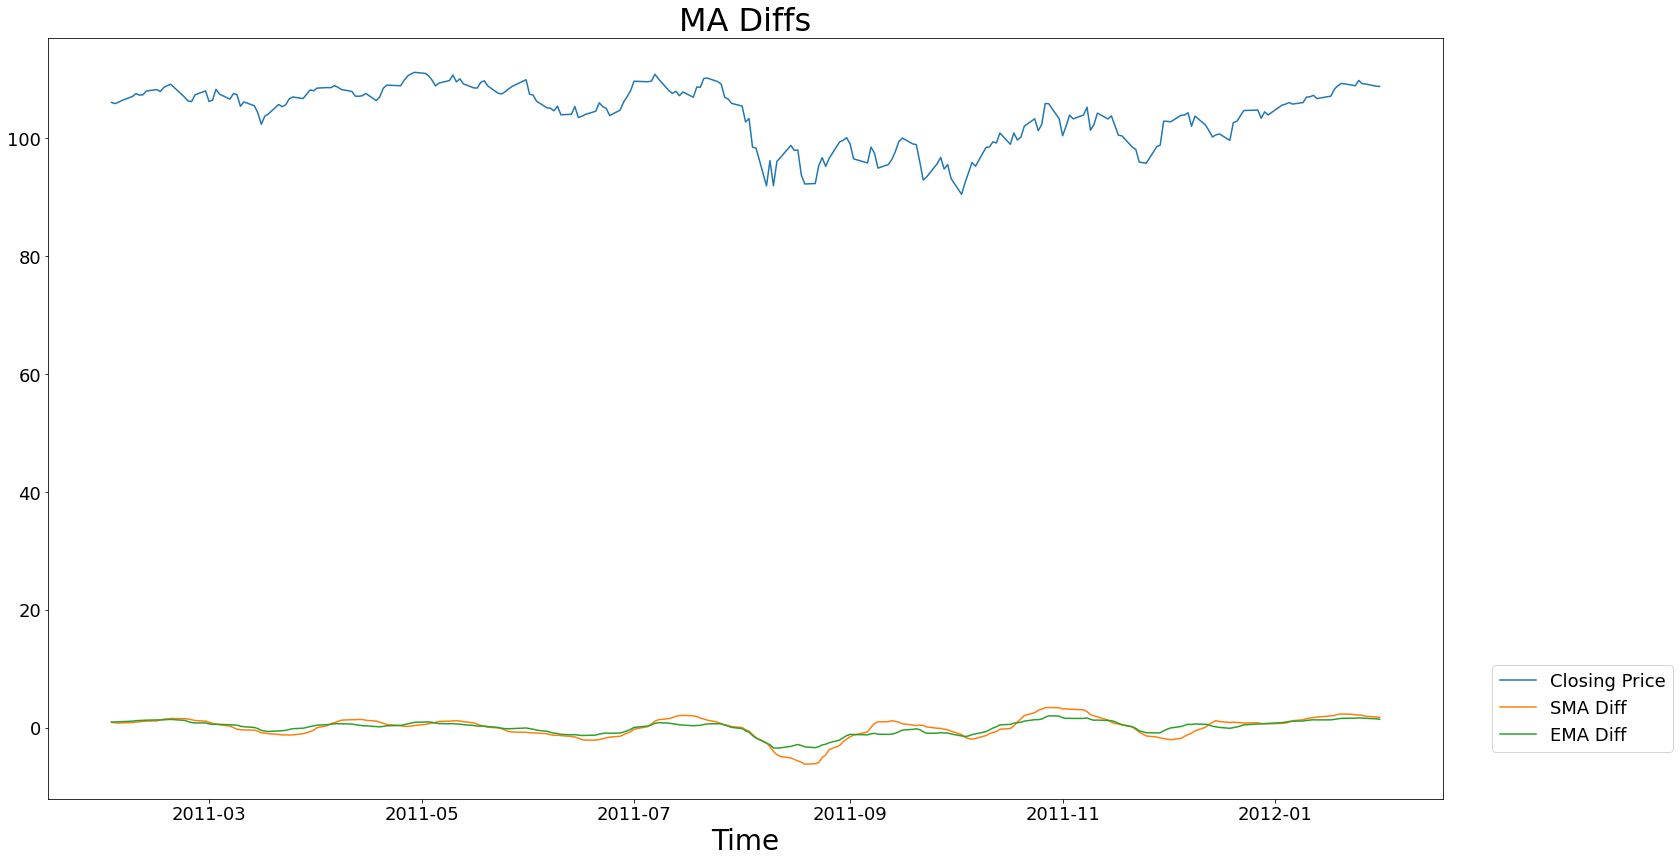

In [45]:
plt.figure(figsize=(25,14))

plt.plot(df[start:end]['Close'], label='Closing Price')
plt.plot(df[start:end]['feature_sma_diff'], label='SMA Diff')
plt.plot(df[start:end]['feature_ema_diff'], label='EMA Diff')

plt.legend(loc='lower center', bbox_to_anchor=(1.1, 0.05), fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time', fontsize=28)

plt.title('MA Diffs', fontsize=32)

plt.show()

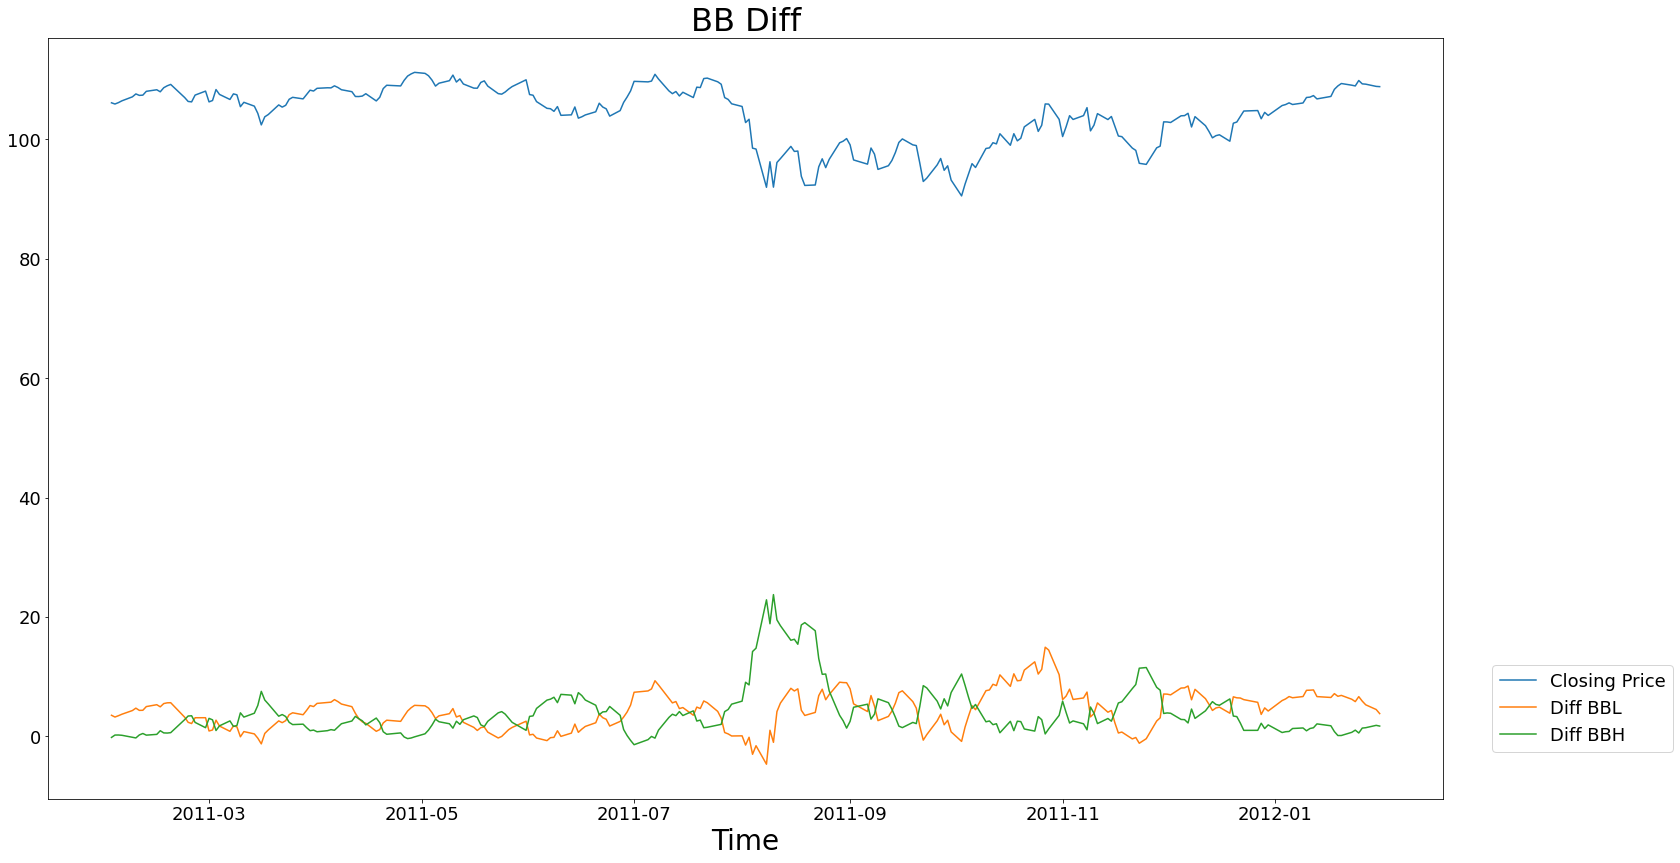

In [46]:
plt.figure(figsize=(25,14))

plt.plot(df[start:end]['Close'], label='Closing Price')
plt.plot(df[start:end]['feature_diff_bbl'], label='Diff BBL')
plt.plot(df[start:end]['feature_diff_bbh'], label='Diff BBH')

plt.legend(loc='lower center', bbox_to_anchor=(1.1, 0.05), fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time', fontsize=28)

plt.title('BB Diff', fontsize=32)

plt.show()